In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
from tqdm import tqdm
import csv

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
matplotlib.rcParams.update({'font.size': 14})

In [2]:
mas_t = np.arange(1998,2022)
mas_t

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021])

In [3]:
# Чтение из файла
with open("data_CHEL_GPD.csv") as file_name:
    mas_GPD = np.loadtxt(file_name, delimiter=",")

print(mas_GPD)

with open("data_CHEL_EXP.csv") as file_name:
    mas_EXP = np.loadtxt(file_name, delimiter=",")

print(mas_EXP)

[-16.9   8.4  10.7   3.1   0.9   8.5   4.9   8.3  10.6  13.4   1.5 -14.1
   6.    5.3   2.4   1.5   2.8  -0.5  -3.1   1.8   1.   -0.7]
[34.53338683 28.32593506 26.73418435 26.95176746 28.46635244 30.10220487
 30.17625873 26.53434565 29.92401291 30.35294228 31.74761739 31.68902303
 33.51649    30.86227936 30.96636682 29.94326898 28.67316913 25.39093269
 24.46059737 25.1260524  27.12412479 27.85541374]


In [6]:
len(mas_t), len(mas_GPD)

(24, 22)

In [5]:
res = stats.linregress(mas_EXP, mas_GPD)

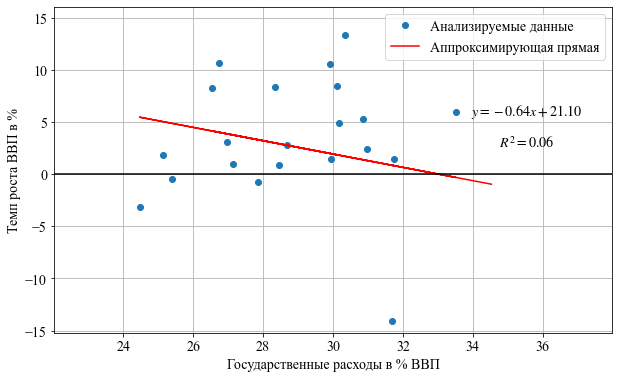

In [5]:
plt.figure(figsize=(10,6))
plt.plot(mas_EXP, mas_GPD, 'o', label='Анализируемые данные')
plt.plot(mas_EXP, res.intercept + res.slope*mas_EXP, 'r', label='Аппроксимирующая прямая')
plt.plot([0,100],[0,0],c='black')
plt.legend()
plt.grid()
plt.text(max(mas_EXP)+1,3,f'$R^{2} = {res.rvalue**2:.2f} $',horizontalalignment='center', verticalalignment='center')
plt.text(max(mas_EXP)+1,3*2,f'$y = {res.slope:.2f}x + {res.intercept:.2f} $',horizontalalignment='center', verticalalignment='center')
plt.xlim([min(mas_EXP)*0.9, max(mas_EXP)*1.1])
plt.ylim([min(mas_GPD)*0.9, max(mas_GPD)*1.2])
plt.xlabel('Государственные расходы в % ВВП')
plt.ylabel('Темп роста ВВП в %')
plt.savefig('OBLAST',dpi = 300)

In [7]:
# -0.02035*x**2 + 0.76152*x  -1.56117

In [8]:
mas_VNP = [44611.9,79117.6,120561.0,142461.9,172446.4,220185.2,291179.9,349957,446918,575643.7,664492.7,556985.3,652865.5,774401,841972.2,882339.2,993900.6,1209242.7,1332761.4,1416613.3,1521325.4,1545582.5]

In [9]:
len(mas_VNP)

22

In [8]:
progn_mas_t = np.arange(2022,2044)
progn_mas_EXP = np.zeros(len(progn_mas_t))
final_EXP = 20
norm = (mas_EXP[-1]-final_EXP)/(len(progn_mas_t)-1)
progn_mas_GPD = np.zeros(len(progn_mas_t))
progn_mas_VNP_val = np.zeros(len(progn_mas_t))
for i in range(len(progn_mas_t)):
    if i!=0:
        if progn_mas_EXP[i-1]>final_EXP:
            progn_mas_EXP[i] = mas_EXP[-1]-norm*i
            progn_mas_GPD[i] = -0.64*progn_mas_EXP[i] + 21.1
            progn_mas_VNP_val[i] = progn_mas_VNP_val[i-1]*(progn_mas_GPD[i]/100+1)
        else:
            progn_mas_EXP[i] = final_EXP
            progn_mas_GPD[i] = -0.64*progn_mas_EXP[i] + 21.1
            progn_mas_VNP_val[i] = progn_mas_VNP_val[i-1]*(progn_mas_GPD[i]/100+1)
    else:
        progn_mas_EXP[i] = mas_EXP[-1]
        progn_mas_GPD[i] = progn_mas_EXP[i]*(-0.64) + 21.1
        progn_mas_VNP_val[i] = mas_VNP[-1]*(progn_mas_GPD[i]/100+1)

In [9]:
progn_mas_t

array([2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032,
       2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043])

In [10]:
progn_mas_EXP

array([27.85541374, 27.48134641, 27.10727909, 26.73321177, 26.35914445,
       25.98507713, 25.61100981, 25.23694249, 24.86287517, 24.48880785,
       24.11474053, 23.74067321, 23.36660589, 22.99253857, 22.61847125,
       22.24440392, 21.8703366 , 21.49626928, 21.12220196, 20.74813464,
       20.37406732, 20.        ])

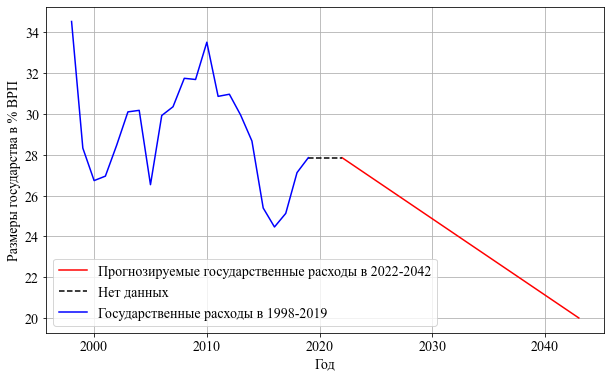

In [11]:
plt.figure(figsize=(10,6))
plt.plot(progn_mas_t,progn_mas_EXP,label='Прогнозируемые государственные расходы в 2022-2042',color = 'r')
plt.plot([mas_t[-1],progn_mas_t[0]],[mas_EXP[-1],progn_mas_EXP[0]],label='Нет данных',color = 'black', linestyle='--')
plt.plot(mas_t,mas_EXP,label='Государственные расходы в 1998-2019',color = 'b')
plt.ylabel('Размеры государства в % ВРП')
plt.xlabel('Год')
plt.legend()
plt.grid()
plt.savefig('CHEL_EXP',dpi=600)

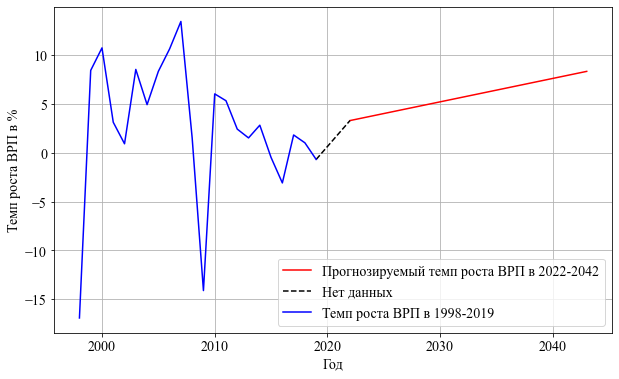

In [12]:
plt.figure(figsize=(10,6))
plt.plot(progn_mas_t,progn_mas_GPD,label='Прогнозируемый темп роста ВРП в 2022-2042',color = 'r')
plt.plot([mas_t[-1],progn_mas_t[0]],[mas_GPD[-1],progn_mas_GPD[0]],label='Нет данных',color = 'black', linestyle='--')
plt.plot(mas_t,mas_GPD,label='Темп роста ВРП в 1998-2019',color = 'b')
plt.ylabel('Темп роста ВРП в %')
plt.xlabel('Год')
plt.legend()
plt.grid()
plt.savefig('CHEL_GPD',dpi=600)

In [13]:
mas_t = np.array(mas_t)
mas_VNP = np.array(mas_VNP)

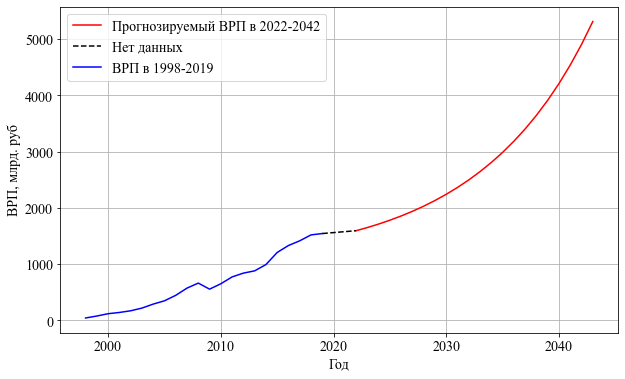

In [15]:
plt.figure(figsize=(10,6))
plt.plot(progn_mas_t,progn_mas_VNP_val/1000,label='Прогнозируемый ВРП в 2022-2042',color = 'r')
plt.plot([mas_t[-1],progn_mas_t[0]],[mas_VNP[-1]/1000,progn_mas_VNP_val[0]/1000],label='Нет данных',color = 'black', linestyle='--')
plt.plot(mas_t,mas_VNP/1000,label='ВРП в 1998-2019',color = 'b')
plt.ylabel('ВРП, млрд. руб')
plt.xlabel('Год')
plt.legend()
plt.grid()
plt.savefig('CHEL_VRP',dpi=600)

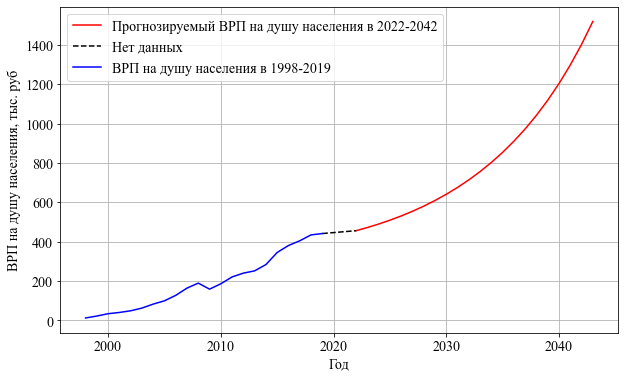

In [17]:
naselenie = 3.5*10**6 / 1000 # с учетом млн -> в руб
plt.figure(figsize=(10,6))
plt.plot(progn_mas_t,progn_mas_VNP_val/naselenie,label='Прогнозируемый ВРП на душу населения в 2022-2042',color = 'r')
plt.plot([mas_t[-1],progn_mas_t[0]],[mas_VNP[-1]/naselenie,progn_mas_VNP_val[0]/naselenie],label='Нет данных',color = 'black', linestyle='--')
plt.plot(mas_t,mas_VNP/naselenie,label='ВРП на душу населения в 1998-2019',color = 'b')
plt.ylabel('ВРП на душу населения, тыс. руб')
plt.xlabel('Год')
plt.legend()
plt.grid()
plt.savefig('CHEL_VRP_ydel',dpi=600)

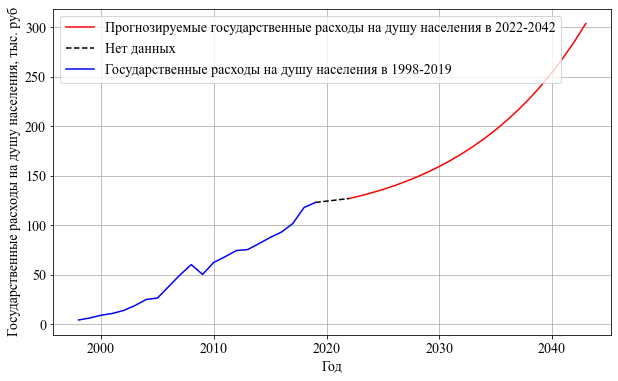

In [82]:
naselenie = 3.5*10**6 / 1000 * 100
plt.figure(figsize=(10,6))
plt.plot(progn_mas_t,progn_mas_VNP_val*progn_mas_EXP/naselenie,label='Прогнозируемые государственные расходы на душу населения в 2022-2042',color = 'r')
plt.plot([mas_t[-1],progn_mas_t[0]],[mas_VNP[-1]*mas_EXP[-1]/naselenie,progn_mas_VNP_val[0]*progn_mas_EXP[0]/naselenie],label='Нет данных',color = 'black', linestyle='--')
plt.plot(mas_t,mas_VNP*mas_EXP/naselenie,label='Государственные расходы на душу населения в 1998-2019',color = 'b')
plt.ylabel('Государственные расходы на душу населения, тыс. руб')
plt.xlabel('Год')
plt.legend()
plt.grid()
plt.savefig('CHEL_EXP_ydel',dpi=600)

In [73]:
for i in range(len(progn_mas_t)):
    print(f'{progn_mas_VNP_val[i]*progn_mas_EXP[i]/naselenie:.2f}')

127.03
129.73
132.76
136.16
139.93
144.11
148.72
153.80
159.38
165.51
172.21
179.56
187.59
196.37
205.97
216.47
227.94
240.50
254.23
269.26
285.71
303.75


In [76]:
303.75/127.03

2.3911674407620245